<a href="https://colab.research.google.com/github/aadhityamenon/general-project-fall25/blob/aadhityamenoncnn/Menon_CNN_10_23_25_Caretech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# TODO: Import libraries required here
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Using MNIST dataset: 28x28 grayscale images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension (CNN expects 3D inputs)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
# Each image is 28×28 pixels, grayscale (1 channel).
# Normalization helps the model learn faster.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


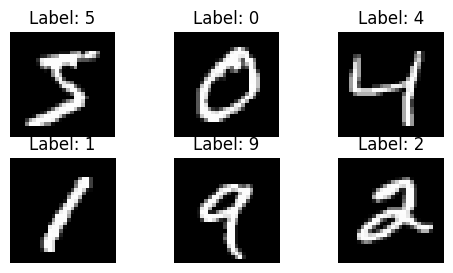

In [4]:
# Show images
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# What do you notice about how similar some digits look?
# Things to think about: What do you notice about how similar some digits look?

In [5]:
#Building a simple CNN

model = models.Sequential([
    # TODO: Add first Conv2D layer (32 filters, 3x3 kernel, 'relu', input_shape=(28,28,1))
    # layers.Conv2D(...),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    # TODO: Add MaxPooling layer (2x2)
    # layers.MaxPooling2D(...),

    # TODO: Add second Conv2D layer (64 filters, 3x3, 'relu')
    # layers.Conv2D(...),

    # TODO: Add second MaxPooling layer
    # layers.MaxPooling2D(...),

    # TODO: Add Dense layer with 64 units, 'relu' activation
    # layers.Dense(...),

    # TODO: Add final Dense layer with 10 units, 'softmax' activation
    # layers.Dense(...)
])

model.summary()

# Exercise:
# Why do early layers detect edges and later layers detect shapes? Discuss.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the Model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))
# TODO: Compile the model using:
# optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
# model.compile(...)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8984 - loss: 0.3326 - val_accuracy: 0.9829 - val_loss: 0.0495
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9852 - loss: 0.0479 - val_accuracy: 0.9893 - val_loss: 0.0353
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9888 - val_loss: 0.0339
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9924 - loss: 0.0233 - val_accuracy: 0.9887 - val_loss: 0.0335
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0.9907 - val_loss: 0.0302


In [9]:
# Evaluate the Model

# TODO: Evaluate test accuracy
# test_loss, test_acc = model.evaluate(...)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.3f}")
print(f"\nTest loss: {test_loss:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9891 - loss: 0.0380

Test accuracy: 0.991

Test loss: 0.030


In [17]:
# Make Predictions

# TODO: Predict the first 9 test images
# predictions = model.predict(...)
predictions = model.predict(x_test[:9])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


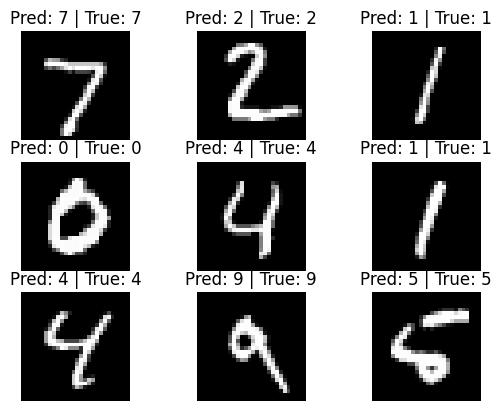

In [21]:
# Run this:
# plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    # TODO: Display predicted and true label
    plt.title(f"Pred: {np.argmax(predictions[i])} | True: {y_test[i]}")
    plt.axis('off')
plt.show()

# Exercise:
# What kind of patterns do you think the CNN looked at to decide each number?
# Response: The CNN probably looked at the pixel patterns on a grid to decide each number. The CNN probably tried to match patterns from the training data to the testing data.